In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

01) Dados da Sala de Aula em situação vazia:

In [3]:
# Velocidade sonora a 20*C
SOUNDSPEED = 343

# Dimensões da sala em metros
comprimento = 5.89
largura = 8.50
altura = 3.26

# areas em m²
janela = 5.58
porta = 1.94
quadro = 5.45

02) Calculo de Área total (S)  

In [4]:
# Áreas Superficies
parede_lateral = (comprimento * altura) * 2
parede_fundo = (largura * altura) - janela
parede_frente = (largura * altura) - porta
piso = largura * comprimento
teto = largura * comprimento
volume = comprimento * largura * altura
area_Total_Superficies = parede_lateral + parede_fundo + parede_frente + piso + teto + porta + janela
print(f"A area total das Superficies será: S = {area_Total_Superficies:.2f} m²", )

A area total das Superficies será: S = 193.95 m²


03) Criação de um Dataframe preliminar com informações da Sala

In [5]:
dados = {
    "Áreas": ["Parede Lateral", "Parede Fundo", "Parede Frente", "Piso", "Teto", "Porta", "Janela"],
    "Superfícies (m²)": [parede_lateral, parede_fundo, parede_frente, piso, teto, porta, janela],
    "Material":  ["Parede Pintada", "Parede Pintada", "Parede Pintada", "Piso Cerâmico", "Parede Pintada", "Porta", "Vidro"]
    
}

df = pd.DataFrame(dados)
print("---------------------------------------------------")
print(df)
print("---------------------------------------------------")

---------------------------------------------------
            Áreas  Superfícies (m²)        Material
0  Parede Lateral           38.4028  Parede Pintada
1    Parede Fundo           22.1300  Parede Pintada
2   Parede Frente           25.7700  Parede Pintada
3            Piso           50.0650   Piso Cerâmico
4            Teto           50.0650  Parede Pintada
5           Porta            1.9400           Porta
6          Janela            5.5800           Vidro
---------------------------------------------------


04) Frequências sonoras

In [6]:
frequencias = [125, 250, 500, 1000, 2000, 4000]

05) Inserção de dados dos Coeficientes de absorção dos materiais

In [7]:
mean_alpha = {
    "Piso Cerâmico": {125: 0.01, 250: 0.01, 500: 0.01, 1000: 0.02, 2000: 0.02, 4000: 0.02},
    "Parede Pintada": {125: 0.14, 250: 0.10,  500: 0.06, 1000: 0.05, 2000: 0.04, 4000: 0.03},
    "Porta": {125: 0.05, 250: 0.00, 500: 0.03, 1000: 0.00, 2000: 0.03, 4000: 0.00},
    "Vidro": {125: 0.10, 250: 0.00, 500: 0.04, 1000: 0.00, 2000: 0.02, 4000: 0.00}
}
# Adicionar nessa tabela aqui embaixo outros materiais

coeficientes_df = pd.DataFrame(mean_alpha)
print("---------------------------------------------------")
print(coeficientes_df)
print("---------------------------------------------------")


---------------------------------------------------
      Piso Cerâmico  Parede Pintada  Porta  Vidro
125            0.01            0.14   0.05   0.10
250            0.01            0.10   0.00   0.00
500            0.01            0.06   0.03   0.04
1000           0.02            0.05   0.00   0.00
2000           0.02            0.04   0.03   0.02
4000           0.02            0.03   0.00   0.00
---------------------------------------------------


06) Média ponderada para cada material

In [8]:
def calculo_media_ponderada(material, frequencias, mean_alpha):
    media_ponderada = 0
    
    for freq in frequencias:
        media_ponderada += mean_alpha[material][freq]
        
    return media_ponderada / len(frequencias)

07) Média ponderada para cada linha do DataFrame


In [9]:
medias_ponderadas = []

for material in dados["Material"]:
    media_ponderada = calculo_media_ponderada(material, frequencias, mean_alpha)
    medias_ponderadas.append(media_ponderada)

In [10]:
dados["NRC"] = medias_ponderadas
df = pd.DataFrame(dados)
print(df)

            Áreas  Superfícies (m²)        Material       NRC
0  Parede Lateral           38.4028  Parede Pintada  0.070000
1    Parede Fundo           22.1300  Parede Pintada  0.070000
2   Parede Frente           25.7700  Parede Pintada  0.070000
3            Piso           50.0650   Piso Cerâmico  0.015000
4            Teto           50.0650  Parede Pintada  0.070000
5           Porta            1.9400           Porta  0.018333
6          Janela            5.5800           Vidro  0.026667


08) Calculo da absorção para cada área em cada frequência

In [11]:
absorcao_por_area = {} 

for index, row in df.iterrows():
    area = row["Superfícies (m²)"]
    material = row["Material"]
    coeficientes_material = mean_alpha[material]
    
    absorcao_por_frequencia = []
    for freq in frequencias:
        absorcao = area * coeficientes_material[freq]
        absorcao_por_frequencia.append(absorcao)
    
    absorcao_por_area[row["Áreas"]] = absorcao_por_frequencia
    
# Crie um novo DataFrame para armazenar a absorção por área em cada frequência
absorcao_df = pd.DataFrame(absorcao_por_area, index=frequencias).T

print("------------------------------------------------------------------------")
print("Absorção por área em cada frequência:")
print(absorcao_df)
print("------------------------------------------------------------------------")

------------------------------------------------------------------------
Absorção por área em cada frequência:
                    125      250       500      1000      2000      4000
Parede Lateral  5.376392  3.84028  2.304168  1.92014  1.536112  1.152084
Parede Fundo    3.098200  2.21300  1.327800  1.10650  0.885200  0.663900
Parede Frente   3.607800  2.57700  1.546200  1.28850  1.030800  0.773100
Piso            0.500650  0.50065  0.500650  1.00130  1.001300  1.001300
Teto            7.009100  5.00650  3.003900  2.50325  2.002600  1.501950
Porta           0.097000  0.00000  0.058200  0.00000  0.058200  0.000000
Janela          0.558000  0.00000  0.223200  0.00000  0.111600  0.000000
------------------------------------------------------------------------


09) Soma dos valores por coluna

In [12]:
soma_por_frequencia = absorcao_df.sum()

# Imprima os resultados
print("---------------------------------------------------")
print("Soma dos valores de cada coluna:")
print(soma_por_frequencia)
print("---------------------------------------------------")

---------------------------------------------------
Soma dos valores de cada coluna:
125     20.247142
250     14.137430
500      8.964118
1000     7.819690
2000     6.625812
4000     5.092334
dtype: float64
---------------------------------------------------


10) Calculo dp coeficiente de absorção médio em cada frequência


In [13]:
# Calcular o coeficiente de absorção médio em cada frequência
absorcao_medio_125 = soma_por_frequencia[125] / area_Total_Superficies
absorcao_medio_250 = soma_por_frequencia[250] / area_Total_Superficies
absorcao_medio_500 = soma_por_frequencia[500] / area_Total_Superficies
absorcao_medio_1000 = soma_por_frequencia[1000] / area_Total_Superficies
absorcao_medio_2000 = soma_por_frequencia[2000] / area_Total_Superficies
absorcao_medio_4000 = soma_por_frequencia[4000] / area_Total_Superficies

11. Criar um dicionário com os dados até o momento

In [14]:
# Criar um dicionário com os dados
dados = {
    "Frequência (Hz)": frequencias,
    "Soma": [
        soma_por_frequencia[125],
        soma_por_frequencia[250],
        soma_por_frequencia[500],
        soma_por_frequencia[1000],
        soma_por_frequencia[2000],
        soma_por_frequencia[4000]
    ],
    "Absorção Média": [
        absorcao_medio_125,
        absorcao_medio_250,
        absorcao_medio_500,
        absorcao_medio_1000,
        absorcao_medio_2000,
        absorcao_medio_4000
    ]
}

# Criar um novo DataFrame com os dados
novo_df = pd.DataFrame(dados)

# Imprimir o novo DataFrame
print("-----------------------------------------------------")
print("Novo DataFrame com Frequência, Soma e Absorção Média:")
print(novo_df)
print("-----------------------------------------------------")

-----------------------------------------------------
Novo DataFrame com Frequência, Soma e Absorção Média:
   Frequência (Hz)       Soma  Absorção Média
0              125  20.247142        0.104392
1              250  14.137430        0.072891
2              500   8.964118        0.046218
3             1000   7.819690        0.040317
4             2000   6.625812        0.034162
5             4000   5.092334        0.026256
-----------------------------------------------------


12) Rt60 Sabine

In [15]:
t60_125 = 0.161 * (volume / (area_Total_Superficies * absorcao_medio_125))
t60_250 = 0.161 * (volume / (area_Total_Superficies * absorcao_medio_250))
t60_500 = 0.161 * (volume / (area_Total_Superficies * absorcao_medio_500))
t60_1000 = 0.161 * (volume / (area_Total_Superficies * absorcao_medio_1000))
t60_2000 = 0.161 * (volume / (area_Total_Superficies * absorcao_medio_2000))
t60_4000 = 0.161 * (volume / (area_Total_Superficies * absorcao_medio_4000))


valores_sabine = [t60_125, t60_250, t60_500, t60_1000, t60_2000, t60_4000]

novo_df["Sabine"] = valores_sabine

print(novo_df)

   Frequência (Hz)       Soma  Absorção Média    Sabine
0              125  20.247142        0.104392  1.297819
1              250  14.137430        0.072891  1.858691
2              500   8.964118        0.046218  2.931367
3             1000   7.819690        0.040317  3.360378
4             2000   6.625812        0.034162  3.965871
5             4000   5.092334        0.026256  5.160132


13) Rt60 Norris-Eyring

In [16]:
t60_e_125 = -(0.161 * volume) / (area_Total_Superficies * math.log(1 - absorcao_medio_125))
t60_e_250 = -(0.161 * volume) / (area_Total_Superficies * math.log(1 - absorcao_medio_250))
t60_e_500 = -(0.161 * volume) / (area_Total_Superficies * math.log(1 - absorcao_medio_500))
t60_e_1000 = -(0.161 * volume) / (area_Total_Superficies * math.log(1 - absorcao_medio_1000))
t60_e_2000 = -(0.161 * volume) / (area_Total_Superficies * math.log(1 - absorcao_medio_2000))
t60_e_4000 = -(0.161 * volume) / (area_Total_Superficies * math.log(1 - absorcao_medio_4000))

valores_Eyring = [t60_e_125, t60_e_250, t60_e_500, t60_e_1000, t60_e_2000, t60_e_4000]

novo_df["Eyring"] = valores_Eyring

print(novo_df)

   Frequência (Hz)       Soma  Absorção Média    Sabine    Eyring
0              125  20.247142        0.104392  1.297819  1.228833
1              250  14.137430        0.072891  1.858691  1.790096
2              500   8.964118        0.046218  2.931367  2.863091
3             1000   7.819690        0.040317  3.360378  3.292173
4             2000   6.625812        0.034162  3.965871  3.897738
5             4000   5.092334        0.026256  5.160132  5.092091


14) Cria um Grafico

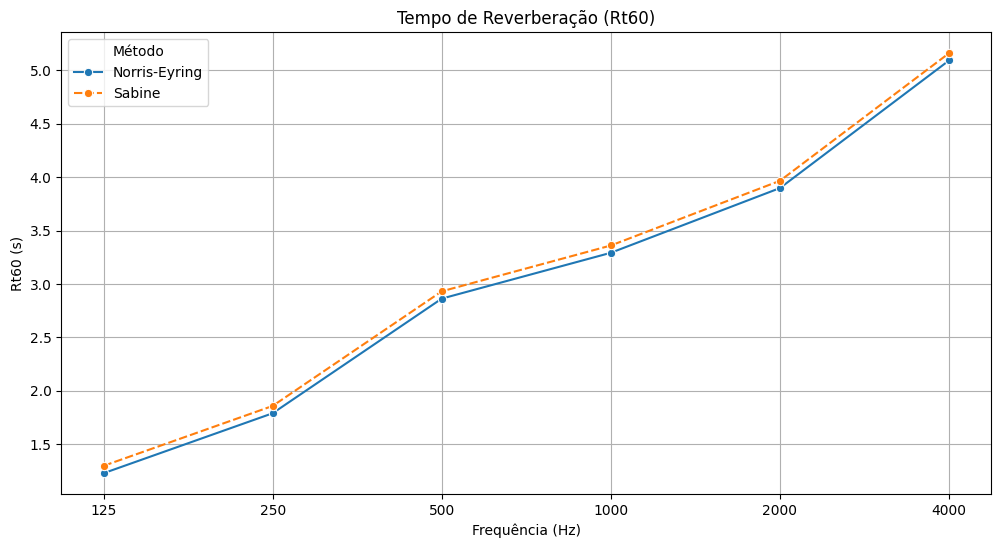

In [17]:
frequencias = ["125", "250", "500", "1000", "2000", "4000"]
t60_valores_1 = [t60_e_125, t60_e_250, t60_e_500, t60_e_1000, t60_e_2000, t60_e_4000]
t60_valores_2 = [t60_125, t60_250, t60_500, t60_1000, t60_2000, t60_4000]

dados = {
    "Frequência (Hz)": frequencias * 2,
    "T60 (s)": t60_valores_1 + t60_valores_2,
    "Método": ["Norris-Eyring"] * len(frequencias) + ["Sabine"] * len(frequencias)
}

df_plot = pd.DataFrame(dados)

plt.figure(figsize=(12, 6))
sns.lineplot(x="Frequência (Hz)", y="T60 (s)", hue="Método", marker="o", style="Método", data=df_plot)
plt.title('Tempo de Reverberação (Rt60)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Rt60 (s)')
plt.grid(True)
plt.show()